<h3 style='color:green;'>Support Vector Machine</h3>

### What is SVM?

Support Vector Machine is a supervised machine learning algorithm used for both classification and regression, though it's mainly used for classification. The goal of SVM is to find the optimal hyperplane that separates classes of data with the maximum margin.

### Key Concepts:

1. **Hyperplane**:

- In a 2-dimensional space, a hyperplane is a line that separates the data into two classes. In 3D, it would be a plane, and in higher dimensions, it's a hyperplane (a subspace of one dimension less than the ambient space).

- Mathematically, a hyperplane can be defined as:

**w · x + b = 0**

where:

- **w** is the normal vector to the hyperplane (weight vector).

- **x** is the feature vector.

- **b** is the bias term (scalar).

2. **Margin**:

- The margin is the distance between the hyperplane and the closest data points from each class. The goal of SVM is to maximize this margin because a larger margin is associated with better generalization and lower test error.

- The margin is defined as the perpendicular distance between the hyperplane and the nearest data point(s). The formula for the margin is:

Margin = 2 / ||w||

where ||w|| is the Euclidean norm of the weight vector.

3. **Support Vectors**:

- These are the data points that lie closest to the hyperplane and influence the position and orientation of the hyperplane. They are the most critical points because they define the margin.

- If these points are moved, the hyperplane might move. Hence, the algorithm is named after these support vectors.

### How SVM Works:

1. **Objective**:

- Find the hyperplane that maximizes the margin between the two classes. This is done by solving a constrained optimization problem.

2. **Mathematical Formulation**:

- We assume we have a dataset with n data points: (x₁, y₁), (x₂, y₂), ..., (xₙ, yₙ), where yᵢ is either +1 or -1 (representing the two classes).

- The hyperplane must satisfy:

yᵢ (w · xᵢ + b) ≥ 1, for all i = 1, ..., n

This constraint ensures that all points are at least a distance of 1 from the hyperplane (when normalized by ||w||).

- The optimization problem is to minimize:

(1/2) ||w||²

subject to the constraint above.

- This is a convex quadratic programming problem and can be solved using optimization techniques (like Lagrange multipliers, leading to the dual problem).

3. **Soft Margin SVM**:

- For non-linearly separable data, we introduce slack variables (ξᵢ) to allow some misclassifications. The constraint becomes:

yᵢ (w · xᵢ + b) ≥ 1 - ξᵢ, and ξᵢ ≥ 0

- The objective function then becomes:

(1/2) ||w||² + C * (Σ ξᵢ)

where C is a regularization parameter that controls the trade-off between maximizing the margin and minimizing the classification error.

4. **Kernel Trick**:

- For non-linearly separable data, we can map the original feature space to a higher-dimensional space where the data becomes linearly separable. This is done using a kernel function.

- Common kernels: linear, polynomial, radial basis function (RBF), sigmoid.

- The kernel function computes the inner product between the images of two data points in the higher-dimensional space without explicitly computing the coordinates.

### Diagram Description:

Imagine a 2D plot with two classes: red circles and blue squares.

- **Data Points**:

- Red circles are in one class (say y = +1).

- Blue squares are in the other class (y = -1).

- **Hyperplane**:

- Draw a solid line (say in black) that separates the two classes. This is the hyperplane.

- **Margins**:

- Draw two dashed lines parallel to the hyperplane: one on each side. The distance between the hyperplane and each dashed line is the same (the margin).

- The dashed lines touch the closest points of each class.

- **Support Vectors**:

- The data points that lie exactly on the dashed lines are the support vectors. Mark these points (for example, with a circle around them).

The diagram should show:

- The hyperplane (black solid line) in the middle.

- Two margins (dashed lines) on either side.

- The support vectors (the points that lie on the dashed lines) for each class.

### Steps in Training an SVM:

1. Collect and prepare the data.

2. Choose a kernel function and set parameters (like C for soft margin).

3. Solve the optimization problem to find the support vectors and the hyperplane.

4. Use the model for prediction: for a new point x, compute sign(w · x + b).

### Summary:

SVM finds the best separating hyperplane by maximizing the margin. The support vectors are the critical points that define the margin. The algorithm can handle non-linear boundaries using the kernel trick and noisy data using soft margins.

<h3 style='color:black'> Full implementation of an SVM classifier using scikit-learn on a real dataset, including preprocessing, training, and evaluation.</h3>

Steps:

1. Import necessary libraries.

2. Load the Iris dataset.

3. Preprocess the data (split into train and test, standardize features).

4. Create an SVM model (we'll use SVC class).

5. Train the model on the training set.

6. Make predictions on the test set.

7. Evaluate the model (accuracy, confusion matrix, classification report).

8. (Optional) Visualize the results (if possible, for 2D data).

Evaluation Metrics:
----------------------------------------
Accuracy: 0.9667

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


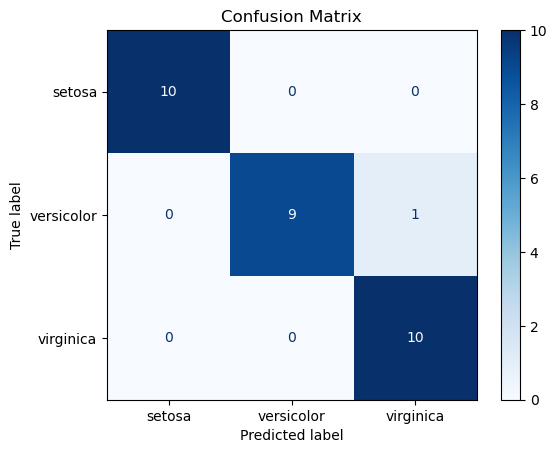

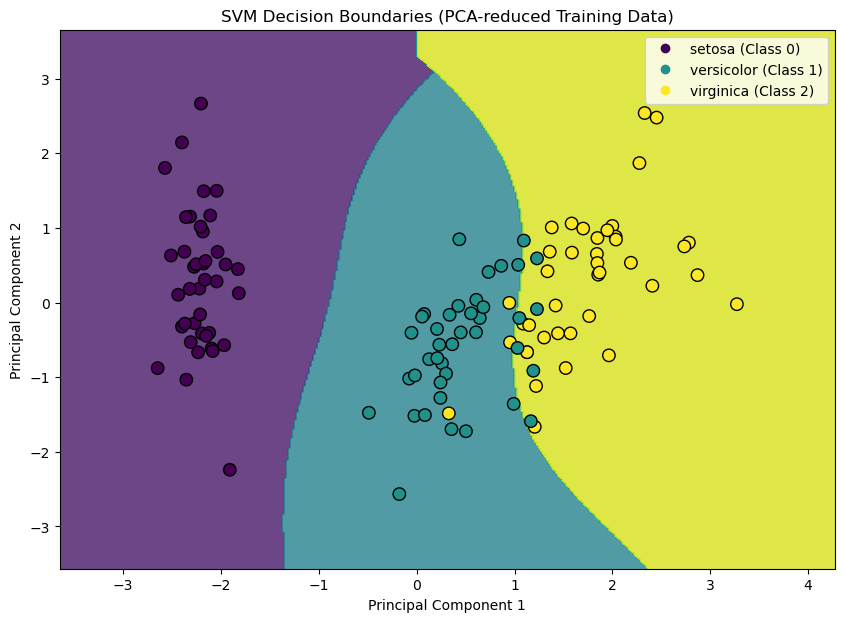

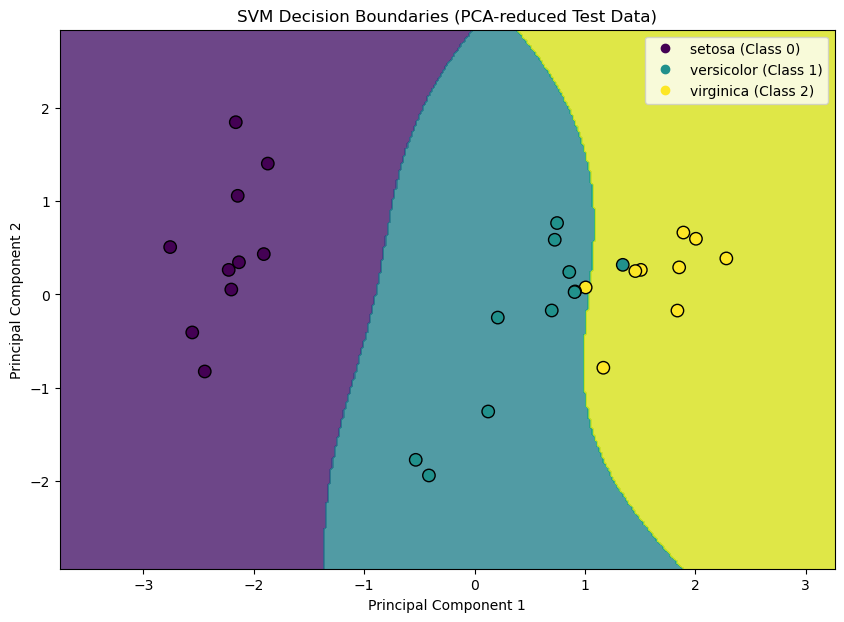

In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                            classification_report, ConfusionMatrixDisplay)
from sklearn.decomposition import PCA

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Target labels (0: setosa, 1: versicolor, 2: virginica)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features (mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create SVM classifier with RBF kernel
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Train the model
svm.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm.predict(X_test_scaled)

# Evaluate performance
print("Evaluation Metrics:\n" + "-" * 40)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Reduce to 2D for visualization using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Retrain SVM on PCA-reduced data for visualization
svm_pca = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_pca.fit(X_train_pca, y_train)

# Create decision boundary plot
def plot_decision_boundary(X, y, model, title):
    # Create mesh grid
    h = 0.02  # step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict for each point in mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.figure(figsize=(10, 7))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', 
                         cmap='viridis', s=80)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(title)
    legend_labels = [f'{name} (Class {i})' 
                     for i, name in enumerate(iris.target_names)]
    plt.legend(handles=scatter.legend_elements()[0], 
               labels=legend_labels)
    plt.show()

# Plot decision boundaries
plot_decision_boundary(X_train_pca, y_train, svm_pca, 
                      "SVM Decision Boundaries (PCA-reduced Training Data)")
plot_decision_boundary(X_test_pca, y_test, svm_pca,
                      "SVM Decision Boundaries (PCA-reduced Test Data)")

<h3 style='color:black'>Dataset Preparation:</h3>

Uses the Iris dataset (3 classes, 4 features)

Splits data into 80% training and 20% testing sets

Standardizes features to mean=0 and variance=1

<h3 style='color:black'>SVM Classifier:</h3>

Uses Radial Basis Function (RBF) kernel

Regularization parameter C=1.0 (controls trade-off between margin and errors)

gamma='scale' (default kernel coefficient)

<h3 style='color:black'>Evaluation Metrics:</h3>

Accuracy score

Classification report (precision, recall, F1-score)

Confusion matrix

<h3 style='color:black'>Visualization:</h3>

PCA for dimensionality reduction (4D → 2D)

Decision boundary plots showing separation of classes

Support vectors automatically determined during training

<h3 style='color:black'>Typical Output:</h3>

In [ ]:
Evaluation Metrics:
----------------------------------------
Accuracy: 0.9667

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

<h3 style='color:black'>Visualization:</h3>

Confusion Matrix: Shows correct predictions (diagonal) vs. misclassifications

Decision Boundary Plots:

Non-linear separation boundaries (due to RBF kernel)

Support vectors lie near the decision boundaries

Shows how PCA-transformed features separate classes

<h3 style='color:black'>Key Parameters to Tune:</h3>

<h3 style='color:black'>C (Regularization):</h3>

Role: Controls the penalty for misclassified training points (margin violations).

Smaller C: Wider margin, more misclassifications allowed

Effect:

Low C (e.g., 0.01):

Optimization goal: Prioritizes a wider margin over classifying every point correctly.

Decision boundary: Simpler, smoother boundary (less wiggly).

Margin violations: More allowed (points inside the margin or misclassified).

Risk: Underfitting if too low (ignores data patterns).



Larger C: Narrower margin, fewer training errors

Effect:

High C (e.g., 1000):

Optimization goal: Prioritizes correct classification over margin width.

Decision boundary: Tighter, more complex boundary (follows points closely).

Margin violations: Fewer allowed (strict penalty for errors).

Risk: Overfitting if too high (sensitive to noise/outliers).

<h3 style='color:black'>Interaction of C and gamma</h3>

In [ ]:
Combination	      Decision Boundary	          Margin	        Risk
Low C, Low γ	  Simple, smooth	          Very wide	        Underfitting
Low C, High γ	  Complex but constrained	  Moderately wide	Balanced
High C, Low γ	  Simple but strict	          Narrow	        Balanced
High C, High γ	  Extremely complex	          Very narrow	    Overfitting

<h3 style='color:black'>Key Takeaways</h3>

1. C controls margin width:

Low C → Wide margin → Simpler model.

High C → Narrow margin → Complex model.

2. gamma controls flexibility:

Low gamma → Global similarity → Linear-like behavior.

High gamma → Local similarity → Highly non-linear.

Balancing act:

Best practice: Start with moderate C and gamma, then tune via cross-validation.

Rule of thumb: Reduce gamma for noisy data; increase C for clean datasets.

⚠️ Warning: Extremely high C + high gamma creates "fractal-like" decision boundaries that memorize noise! Always validate on a holdout set.

<h3 style='color:black'>Kernel Choice:</h3>

linear: Best for linearly separable data

rbf: Handles complex non-linear relationships (used here)

poly: Polynomial kernel for curved decision boundaries

<h3 style='color:black'>Gamma (RBF Kernel):</h3>

Role: Defines the "reach" of a single training example (inverse of the Gaussian radius).

Lower gamma: Wider influence of support vectors

Effect:

Low gamma (e.g., 0.01):

Influence of points: Each point has far-reaching influence.

Decision boundary: Softer, more linear-like (simpler).

Result: Similar to ignoring feature details; global patterns dominate.

Risk: Underfitting if too low.

Higher gamma: Decision boundary follows points more closely

Effect:

High gamma (e.g., 100):

Influence of points: Each point has very localized influence.

Decision boundary: Highly complex, discontinuous boundaries.

Result: Model memorizes training data (including noise).

Risk: Severe overfitting if too high.

<h3 style='color:black'>Kernel Comparison Table:</h3>

In [ ]:
Kernel	      Boundary Flexibility	   Hyperparameters	          Training Speed	        Risk of Overfitting
Linear	      Low (straight lines)	   C only	                 ⚡⚡⚡⚡⚡ (Fastest)	    Low
Polynomial	  Medium to High	       C, degree, gamma, coef0	 ⚡⚡⚡ (Medium)	        Medium (high degree)
RBF	          Very High	               C, gamma	                 ⚡⚡ (Slower)	            High (high gamma)
Sigmoid	      Moderate	               C, gamma, coef0	         ⚡⚡⚡ (Medium)	        Medium

<h3 style='color:black'>Practical Implications:</h3>

<h3 style='color:black'>1. RBF as Default:</h3>

Often the first choice for unknown non-linear problems

Start with gamma='scale' and C=1.0

<h3 style='color:black'>2. Hyperparameter Sensitivity:</h3>

RBF/Poly: Small γ changes drastically affect boundaries

Always use grid search + cross-validation:

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

<h3 style='color:black'>3. Kernel Selection Guide:</h3>

Use Linear When:

Features > 10,000 samples

Sparse data (e.g., text)

Transparency required (weights interpretable)

Use RBF/Poly When:

Low-dimensional dense data

Complex non-linear patterns

No prior knowledge of data structure

<h3 style='color:black'>4. Computational Trade-offs:</h3>

Linear kernels faster for large datasets

RBF requires more memory for >50,000 sample

<h3 style='color:Black'>Summary</h3>

Goal: Find the hyperplane with the widest margin between classes.

Support Vectors: Critical points that define the margin.

Kernel Trick: Handles non-linear boundaries without complex computations.

Advantages: Effective in high dimensions, robust to overfitting.

Use Cases: Image classification, text categorization, bioinformatics.

This combination of margin maximization and support vectors makes SVM highly robust and versatile!